In [164]:
from astroduet import models
import numpy as np
%load_ext autoreload
%autoreload 2
import astropy.units as u

from matplotlib import pyplot as plt
from astropy.visualization import quantity_support
import matplotlib
font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)
from astropy.modeling import models
bb = models.BlackBody1D()
from astropy.modeling.models import BlackBody1D
from astropy.modeling.blackbody import FLAM
from astroduet import config
duet = config.Telescope() 



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
sims = models.Simulations()


In [3]:
sims.emgw_simulations

['shock_2.5e10.dat',
 'shock_5e10.dat',
 'shock_1e11.dat',
 'kilonova_0.01.dat',
 'kilonova_0.02.dat',
 'kilonova_0.04.dat']

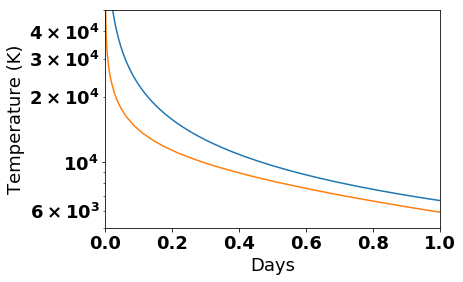

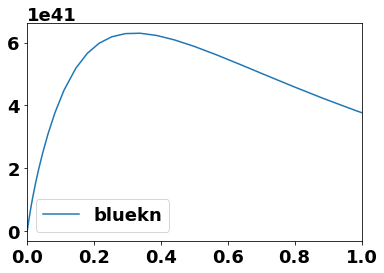

In [75]:
indir = '../astroduet/data/'
shock_data = np.loadtxt(indir+'shock_5e10.dat')

time = (shock_data[:,0]*u.d)
temps = shock_data[:,2]
bolflux = 10**shock_data[:,1]


plt.plot(time, temps, label = 'shock')
shock_data = np.loadtxt(indir+'kilonova_0.02.dat')

time = (shock_data[:,0]*u.d)
temps = shock_data[:,2]
bolflux = 10**shock_data[:,1]
plt.plot(time, temps, label = 'bluekn')

plt.yscale('Log')
#plt.xscale('Log')

plt.ylim([5e3, 5e4])
plt.xlim([0, 1])
plt.xlabel('Days')
plt.ylabel('Temperature (K)')
plt.figure()
plt.plot(time, bolflux, label = 'bluekn')
plt.xlim([0, 1])



plt.legend()
plt.show()



2.4147585559972675e-12
[183.13463401 214.1425365 ] nm
[259.5217841  301.16765207] nm


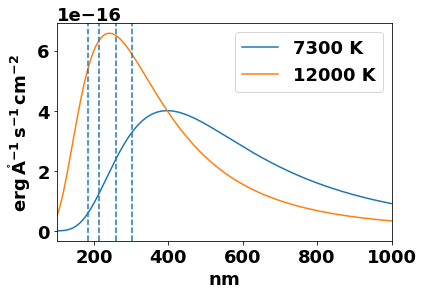

In [131]:
bb = BlackBody1D(temperature=1e5*u.K)
wav = np.arange(100, 10000) * u.nm
flux = bb(wav).to(FLAM, u.spectral_density(wav))

plt.figure()

bb = BlackBody1D(temperature=7300*u.K)
flux = bb(wav).to(FLAM, u.spectral_density(wav))

scale = (4e-16 / flux.max()).value
print(scale)



# with quantity_support():
#     plt.loglog(wav, flux)
#     plt.axvline(bb.lambda_max.to(u.AA).value, ls='--')


wav = np.arange(100, 10000) * u.nm


bb1 = BlackBody1D(temperature=7300*u.K)
bb2 = BlackBody1D(temperature=12000*u.K)


flux1 = bb1(wav).to(FLAM, u.spectral_density(wav))
flux2 = bb2(wav).to(FLAM, u.spectral_density(wav))

f = open('emgw_early_temps.txt', 'w')

with quantity_support():
    plt.plot(wav, flux1*scale, label = '{} K'.format(7300))
    plt.plot(wav, flux2*scale, label = '{} K'.format(12000))

for wc, f1, f2 in zip(wav.to(u.AA).value, flux1.value, flux2.value):
    f.write('{} {} {}\n'.format(wc, f1*scale, f2*scale))
    
f.close()


for band in [duet.bandpass1, duet.bandpass2]:
    print(band)
    with quantity_support():
        plt.axvline(band[0].to(u.nm).value, ls='--')
        plt.axvline(band[1].to(u.nm).value, ls='--')

plt.xlim([100, 1000])

plt.legend()
plt.show()
    

In [101]:
duet.band2

{'eff_wave': <Quantity 280.34471808 nm>,
 'eff_width': <Quantity 41.64586798 nm>}

<Magnitude [ 0.57569262,  0.39623087,  0.22060415, ..., -7.47857435,
            -7.47836821, -7.47816208] mag(AB)>

3.6221378339959015e-12


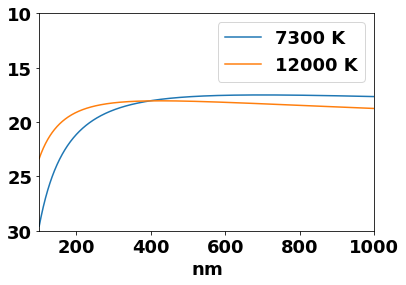

In [119]:
bb = BlackBody1D(temperature=1e5*u.K)
wav = np.arange(100, 10000) * u.nm
flux = bb(wav).to(FLAM, u.spectral_density(wav))

plt.figure()

bb = BlackBody1D(temperature=7300*u.K)
flux = bb(wav).to(FLAM, u.spectral_density(wav))

scale = (6e-16 / flux.max()).value
print(scale)


wav = np.arange(100, 10000) * u.nm
bb1 = BlackBody1D(temperature=7300*u.K)
bb2 = BlackBody1D(temperature=12000*u.K)


ab1 = bb1(wav).to(u.ABmag, u.spectral_density(wav)) + 29*u.ABmag
ab2 = bb2(wav).to(u.ABmag, u.spectral_density(wav)) + 29*u.ABmag


with quantity_support():
    plt.plot(wav, ab1, label = '{} K'.format(7300))
    plt.plot(wav, ab2, label = '{} K'.format(12000))

    
f = open('emgw_early_temps_AB.txt', 'w')
for wc, f1, f2 in zip(wav.to(u.AA).value, ab1, ab2):
    f.write('{} {} {}\n'.format(wc, f1.value, f2.value))
   
f.close()


# for band in [duet.bandpass1, duet.bandpass2]:
#     print(band)
#     with quantity_support():
#         plt.axvline(band[0].to(u.nm).value, ls='--')
#         plt.axvline(band[1].to(u.nm).value, ls='--')

plt.ylim([30, 10])
plt.xlim([100, 1000])

plt.legend()
plt.show()
    

In [132]:
# Convert Swift:


wave = [1928, 2246, 2590, 3529] * u.AA
abmag = [21.13, 21.12, 19.46, 18.19]*u.ABmag
errors = [0.2, 0.2, 0.1, 0.1]
dens = abmag.to(FLAM, u.spectral_density(wave))
print(dens)

f = open('swift_spec_dens.txt', 'w')
for wv, dn, er in zip(wave, dens, errors):
    f.write('{} {} {}\n'.format(wv.value, dn.value, dn.value*er))
f.close()

[1.03420503e-16 7.69132564e-17 2.66821717e-16 4.62932196e-16] erg / (Angstrom cm2 s)


In [170]:
radius = (60 * u.arcmin).to(u.arcsec)
number = 2*232
galaxy_density = (number / (np.pi * radius**2))

galaxy_density = 0.03 / (u.arcmin**2)

constraint = 10 * u.arcsec
constraint_area = np.pi * constraint**2

print(galaxy_density)
print(constraint_area)
print(galaxy_density.cgs *constraint_area.cgs)

0.03 1 / arcmin2
314.1592653589793 arcsec2
0.0026179938779914945
